# **Project Name**    - Health-insurance-cross-sell-prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -**   Jyotipraksh Mohanty

# **Project Summary -**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company. An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee. For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **GitHub Link -**

# **Problem Statement**


Building a predictive model to determine customer interest in vehicle insurance can significantly benefit a company by enabling it to:

1. **Targeted Marketing**: Identify potential customers who are more likely to purchase vehicle insurance, allowing for focused marketing efforts and personalized communication strategies.

2. **Resource Optimization**: Allocate resources efficiently by concentrating efforts on high-probability customers, reducing wasted marketing spend on unlikely leads.

3. **Customer Insights**: Gain deeper insights into customer preferences and behavior, aiding in the development of tailored insurance products that meet specific customer needs.

4. **Revenue Maximization**: Increase sales conversions by engaging with the right customers, thereby boosting overall revenue and profitability.

5. **Customer Retention**: Improve customer retention rates by understanding and addressing the needs and concerns of current policyholders, potentially offering them additional products or services.

6. **Competitive Advantage**: Stay ahead of competitors by leveraging data-driven strategies to anticipate customer needs and market trends.

### Steps :

1. **Data Collection**: Gather relevant data on customer demographics, past purchase behavior, interactions with the company, vehicle details, and any other pertinent information.

2. **Data Preprocessing**: Clean and preprocess the data to handle missing values, outliers, and ensure consistency. This might include data normalization, encoding categorical variables, and feature engineering.

3. **Feature Selection**: Identify and select the most relevant features that influence customer interest in vehicle insurance. This can involve statistical tests, correlation analysis, and domain expertise.

4. **Model Building**: Choose appropriate machine learning algorithms (e.g., logistic regression, decision trees, random forests, gradient boosting machines) to train the model. Split the data into training and testing sets to evaluate the model's performance.

5. **Model Evaluation**: Assess the model using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC to ensure it performs well in predicting customer interest.

6. **Model Deployment**: Implement the model into the company's systems to start making predictions on new customer data. This might involve setting up an API or integrating the model into the CRM or marketing platforms.

7. **Monitoring and Maintenance**: Continuously monitor the model's performance and update it with new data to maintain its accuracy and relevance over time.


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Handling imbalanced datasets
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# Utility
from collections import Counter

# Scaling features
from sklearn.preprocessing import StandardScaler

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Model evaluation metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, roc_auc_score, classification_report

### Dataset Loading

In [ ]:
# Load Dataset
path = "/content/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv"
df = pd.read_csv(path)

### Dataset First View

In [ ]:
# Dataset First Look
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [ ]:
# Look at top 5 rows of dataset
df.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
# Look at last 5 rows of dataset
df.tail(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"Number of rows are : {df.shape[0]}")
print(f"Number of columns are : {df.shape[1]}")

Number of rows are : 381109
Number of columns are : 12


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

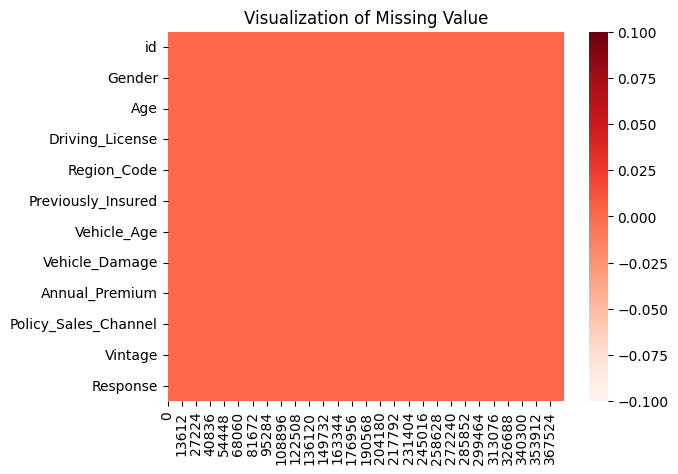

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isna().transpose(), cmap = 'Reds')
plt.title('Visualization of Missing Value')
plt.show()

### What did you know about your dataset?

1. The dataset contains 12 rows and 381109 columns: This statement seems unusual. Typically, in a dataset, rows represent observations or samples, and columns represent features or variables. Having 381109 columns and only 12 rows is extremely unusual and might indicate a problem with data loading or interpretation.

2. There are no null values in this dataset: This statement suggests that the dataset is clean and doesn't contain any missing values, which is good for analysis.

3. There are 4 numeric and 5 categorical features: This statement describes the types of features present in the dataset, indicating that there are four numeric (continuous or discrete) features and five categorical (nominal or ordinal) features.

4. The dependent feature is a categorical column (Response): This statement identifies the target variable or dependent feature in the dataset, indicating that it's a categorical column named "Response."

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Variables Description

1. Id : Unique ID for the customer

2. Gender : Gender of the customer

3. Age : Age of the customer

4. Driving_License 0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code : Unique code for the region of the customer

6. Previously_Insured : 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age : Age of the Vehicle

8. Vehicle_Damage :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium : The amount customer needs to pay as premium in the year

10. PolicySalesChannel : Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage : Number of Days, Customer has been associated with the company

12. Response : 1 : Customer is interested, 0 : Customer is not interested

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
pd.Series(({col:df[col].nunique() for col in df}))

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
data_df = df.copy()

### What all manipulations have you done and insights you found?

Creating a copy of a dataset is a fundamental practice in data management, essential for safeguarding the integrity of the original data. By generating a duplicate dataset, you establish a secure foundation for conducting analyses and making modifications without the risk of altering the primary data source. This precautionary measure not only prevents accidental data corruption but also enables reproducibility by preserving the dataset's initial state. Moreover, maintaining a copy ensures collaborative work can proceed smoothly, allowing team members to explore and manipulate data independently without compromising the integrity of the shared dataset. In essence, the act of creating a copy serves as a crucial cornerstone in maintaining data quality, supporting accurate analyses, and fostering a robust data-centric workflow.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

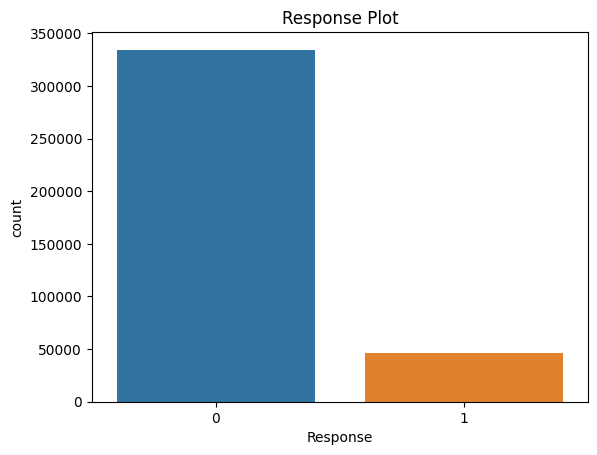

In [ ]:
# Chart - 1 visualization code
sns.countplot(x=data_df['Response'], data = data_df, hue='Response', palette="tab10", legend=False)
plt.title('Response Plot')
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart is good choice while comparing the response.

##### 2. What is/are the insight(s) found from the chart?

The data look highly imbalance as most of  the ressponce are negative from the customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the negative respose from the customer will lead to  the negative growth.

#### Chart - 2

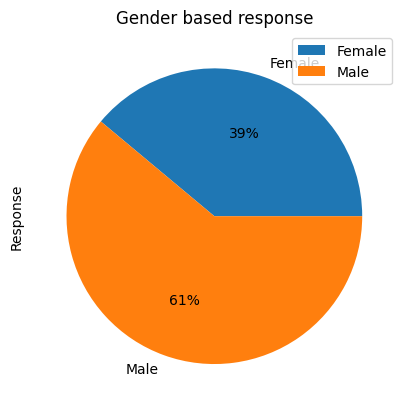

In [ ]:
# Chart - 2 visualization code
df.groupby(['Gender']).sum().plot(
    kind ='pie', y = 'Response', autopct='%1.0f%%')
plt.title('Gender based response')
plt.show()

##### 1. Why did you pick the specific chart?

It is the best choice to show the portion of total data.

##### 2. What is/are the insight(s) found from the chart?

From the total insaurance responce 61% male and 39% are female customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Company should foccus on the female customers to make them aware of the insaurance policies.

#### Chart - 3

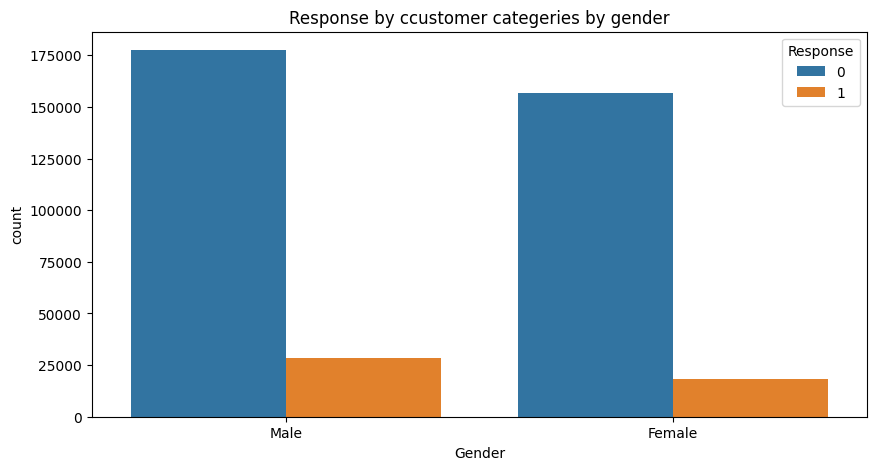

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(10,5))
sns.countplot(x=data_df['Gender'], hue = data_df['Response'], palette= 'tab10')
plt.title('Response by ccustomer categeries by gender')
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart is good choice while comparing the response based on gender.

##### 2. What is/are the insight(s) found from the chart?

The number of female and male customer is almost same. As we can see that male are in positively responding than female cutomers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The company should lure female customers to have insurance policy also should made effort towards male customers.

#### Chart - 4

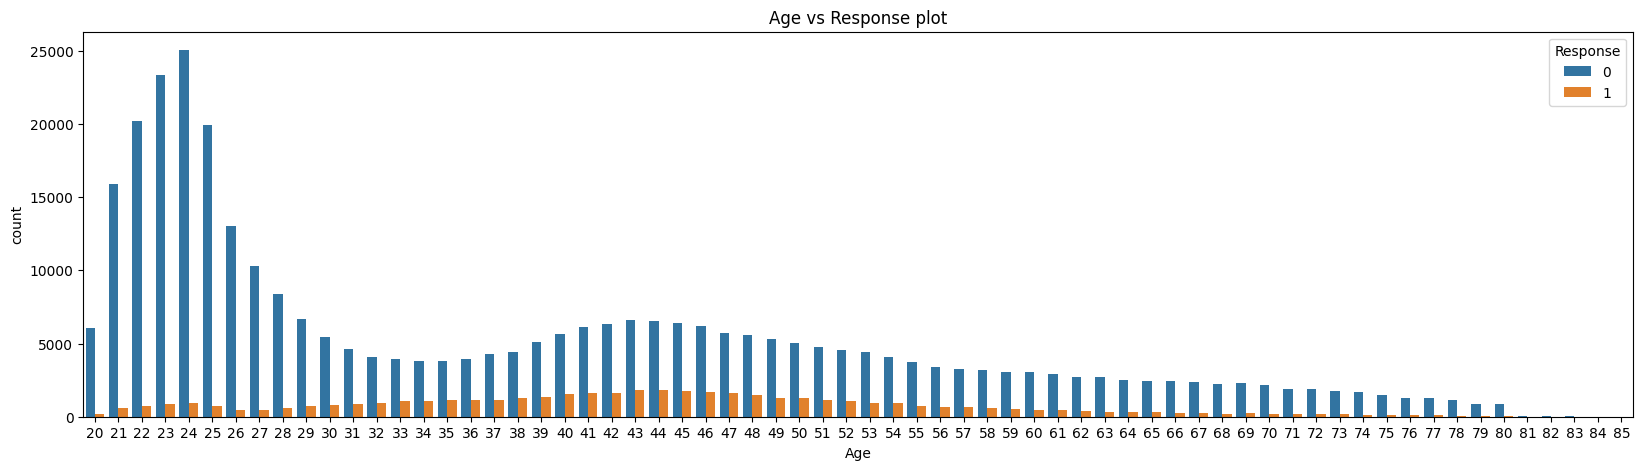

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(20, 5))
sns .countplot(x='Age', hue='Response', data = data_df, palette = 'tab10')
plt.title('Age vs Response plot')
plt.show()

##### 1. Why did you pick the specific chart?

To rightly get insight of the customer age data.

##### 2. What is/are the insight(s) found from the chart?

Most of customer of company are the age of 21 - 25. The company should look towards people in the 30s and 40s as they are more young so the company will have benifite from them.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

People in 40s we can say that are bend toward the insaurance policy then relalively young and old generation.

#### Chart - 5

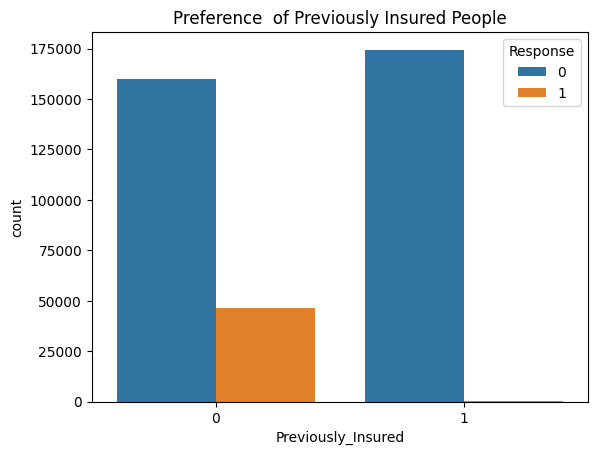

In [ ]:
# Chart - 5 visualization code
sns.countplot(x=data_df['Previously_Insured'], hue='Response', data = data_df, palette = 'tab10')
plt.title('Preference  of Previously Insured People')
plt.show()

##### 1. Why did you pick the specific chart?

To get the value of response of previously injured people have to be seen.

##### 2. What is/are the insight(s) found from the chart?

Customer who are not previosly insured are likely to be interested.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Company should work  on awareness of people.

#### Chart - 6

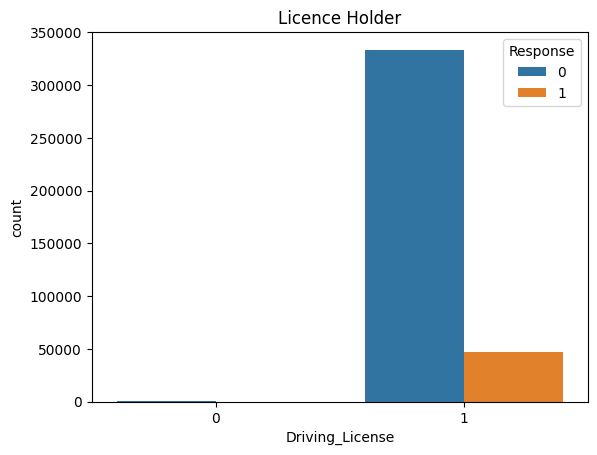

In [ ]:
# Chart - 6 visualization code
sns.countplot(x=data_df['Driving_License'], hue = data_df['Response'], data = data_df, palette = 'tab10')
plt.title('Licence Holder')
plt.show()

##### 1. Why did you pick the specific chart?

To check the response from the driving licence owner response.

##### 2. What is/are the insight(s) found from the chart?

Their are most of the people are licence holder than not and the insaurance is popular among the licence holder.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The company should aware people to buy insaurance.

#### Chart - 7

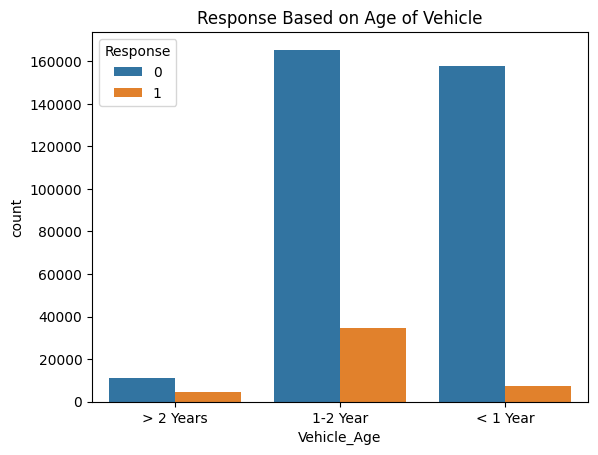

In [ ]:
# Chart - 7 visualization code
sns.countplot(x='Vehicle_Age', hue='Response', data=data_df, palette = 'tab10')
plt.title('Response Based on Age of Vehicle')
plt.show()

##### 1. Why did you pick the specific chart?

The chart is used to show response of the vehicle owner based on the age of the vehicle.

##### 2. What is/are the insight(s) found from the chart?

Customer with vahicle age between 1 and 2 are more likely to buy insaurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The company should focus on marketing the innsaurance to the people are buying new vehical.

#### Chart - 8

<ipython-input-24-eb20a1840f9c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df['Annual_Premium'], color = 'orange')


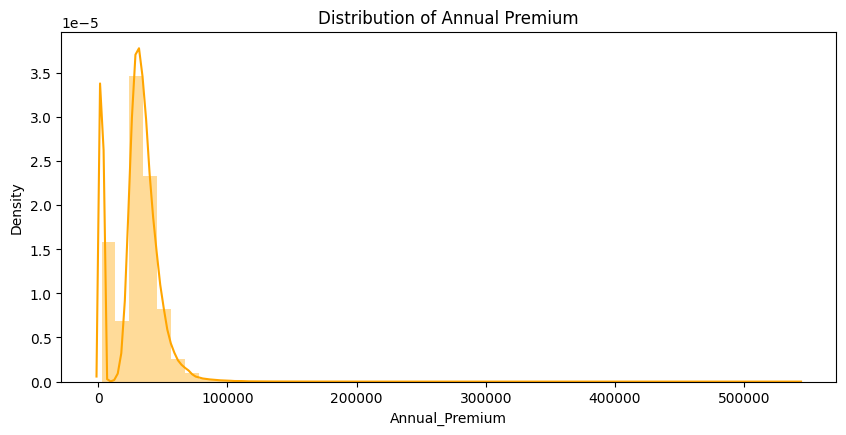

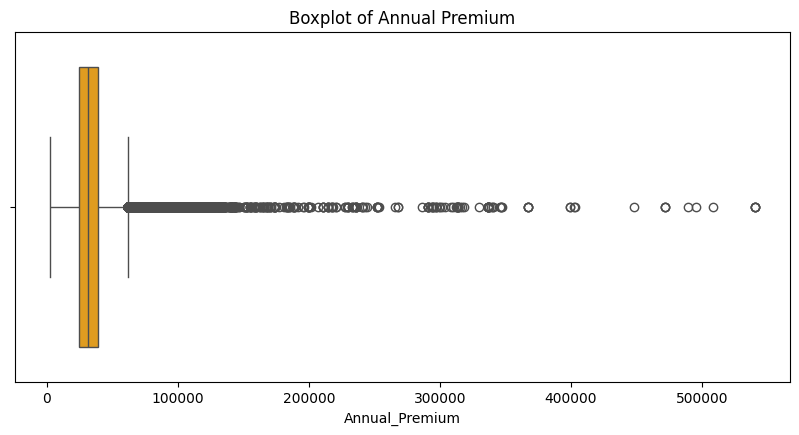

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
sns.distplot(data_df['Annual_Premium'], color = 'orange')
plt.title('Distribution of Annual Premium')
plt.show()
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 2)
sns.boxplot(x = df['Annual_Premium'], color = 'orange')
plt.title('Boxplot of Annual Premium')
plt.show()

##### 1. Why did you pick the specific chart?

To check for data distribution and presence of outliers.

##### 2. What is/are the insight(s) found from the chart?

From the distribution plot we can conclude that the aannual premium variable is right skewed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Their are allot of outliers present in data.

## ***5. Data Preparation***

### 1. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
#outlier column
outlier_column=['Annual_Premium']
#determining the inter-quartile range for the columns with outliers
Q1 = df[outlier_column].quantile(0.25)
Q3 = df[outlier_column].quantile(0.75)
IQR = Q3-Q1
IQR

Annual_Premium    14995.0
dtype: float64

In [ ]:
# determining the upper and lower limit for the removal of outliers
upper_limit = Q3 + (1.5*IQR)
lower_limit = Q1 - (1.5*IQR)
df[outlier_column] = df[outlier_column][~((df[outlier_column] < lower_limit) | (df[outlier_column] > upper_limit))]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        370789 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


### 2. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df['Annual_Premium'] = df['Annual_Premium'].fillna(df['Annual_Premium'].median())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
#changing catagorical value to binary form(0 and 1) using labelEncoder
labelEncoder= LabelEncoder()
df['Gender'] = labelEncoder.fit_transform(df['Gender'])
df['Vehicle_Age'] = labelEncoder.fit_transform(df['Vehicle_Age'])
df['Vehicle_Damage'] = labelEncoder.fit_transform(df['Vehicle_Damage'])

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


## ***6. Feature Manipulation & Selection***

#### 1. Feature Selection

In [ ]:
y=df['Response']      #dependent variable
X=df.drop(columns='Response')        #independent variable

[0.19077277 0.00721311 0.14479773 0.00049296 0.09791238 0.06576875
 0.01740582 0.06511387 0.15481806 0.07012712 0.18557743]


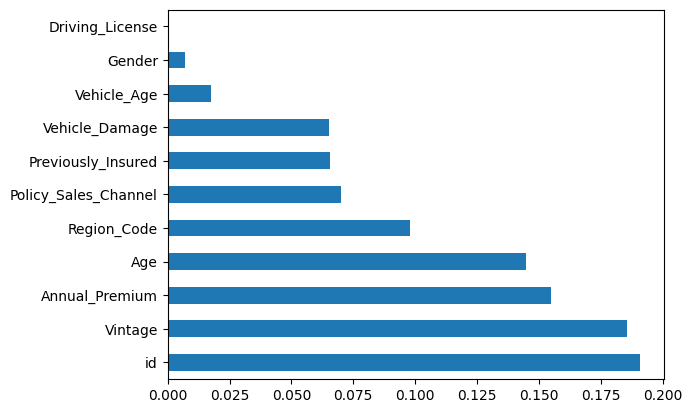

In [ ]:
# Select your features wisely to avoid overfitting
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based class
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

#### 2. Feature Manipolation

In [ ]:
# Select your features wisely to avoid overfitting
X=X.drop(['Driving_License'],axis=1) #dropping driving license as it has very less significance

## ***7.*** ***Handling Class Imbalance***

ML techniques like decision trees and logistic regression show a bias in favour of the majority class and frequently disregard the minority class. Resampling is the method we employ to solve this problem. So random resampling made the data even and now the huge difference has been removed (using oversampling method)

Original dataset shape Counter({0: 334399, 1: 46710})
Resampled dataset shape Counter({1: 334399, 0: 334399})


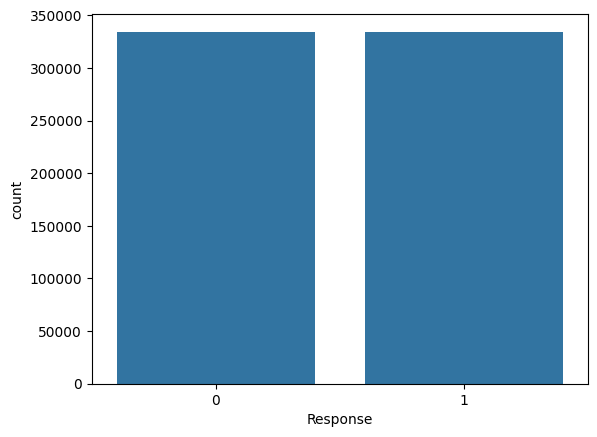

In [ ]:
# Resampling
randomsample=  RandomOverSampler()
x_new,y_new=randomsample.fit_resample(X,y)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(x= y_new)
sns.color_palette("Set2")
plt.show()

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x_new,y_new,test_size=.30,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

(468158, 10) (200640, 10) (468158,) (200640,)


## ***8. ML Model Implementation***

### ML Model - 1. Logistic regression

In [ ]:
# Instantiate the Logistic Regression model
reg = LogisticRegression()

# Fit the model on the training data
reg = reg.fit(X_train, y_train)

# Predict the target variable on the test data
pred = reg.predict(X_test)

# Get the probability predictions for the positive class
lr_probability = reg.predict_proba(X_test)[:, 1]

# Calculate accuracy
acc_lr = accuracy_score(y_test, pred)

# Calculate recall
recall_lr = recall_score(y_test, pred)

# Calculate precision
precision_lr = precision_score(y_test, pred)

# Calculate F1 score
f1score_lr = f1_score(y_test, pred)

# Calculate AUC-ROC score
AUC_LR = roc_auc_score(y_test, lr_probability)

# Print accuracy and AUC values of the model
print("Accuracy : ", accuracy_score(y_test, pred))
print("ROC_AUC Score:", AUC_LR)

Accuracy :  0.7838616427432217
ROC_AUC Score: 0.8190537767600061


In [ ]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.59      0.96      0.73     61426
           1       0.98      0.70      0.82    139214

    accuracy                           0.78    200640
   macro avg       0.78      0.83      0.78    200640
weighted avg       0.86      0.78      0.79    200640



#### 1. ROC curve

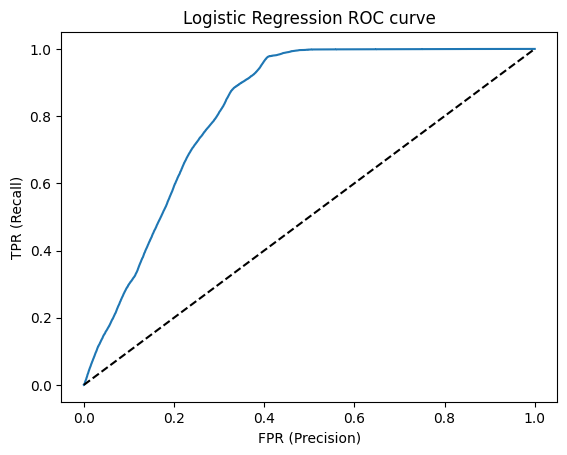

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, lr_probability)

plt.title('Logistic Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()


#### 2. Confusion Matrix

[[59194 41134]
 [ 2232 98080]]


<Axes: >

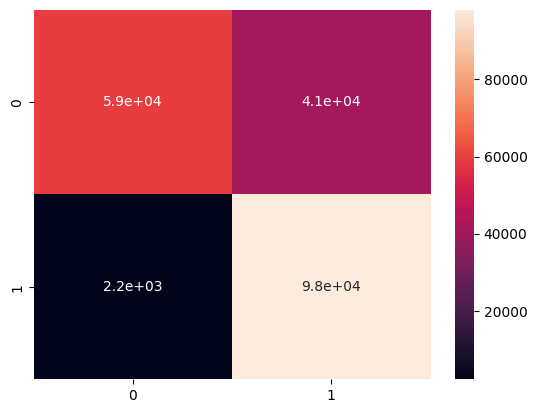

In [ ]:
cm=confusion_matrix(y_test,pred)
print(cm)
sns.heatmap(cm,annot=True)

### ML Model - 2. Random forest classifier

In [ ]:
# Instantiate the Random Forest Classifier
randomforest = RandomForestClassifier()

# Fit the model on the training data
randomforest = randomforest.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = randomforest.predict(X_test)

# Get the probability predictions for the positive class
RF_probability = randomforest.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC score
AUC_RF = roc_auc_score(y_test, RF_probability)

# Calculate accuracy
acc_rf = accuracy_score(y_test, y_pred)

# Calculate recall
recall_rf = recall_score(y_test, y_pred)

# Calculate precision
precision_rf = precision_score(y_test, y_pred)

# Calculate F1 score
f1score_rf = f1_score(y_test, y_pred)

# Print accuracy and AUC values of the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC_AUC Score:", AUC_RF)

Accuracy: 0.945429625199362
ROC_AUC Score: 0.9988355997774305


In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     90101
           1       1.00      0.90      0.95    110539

    accuracy                           0.95    200640
   macro avg       0.95      0.95      0.95    200640
weighted avg       0.95      0.95      0.95    200640



#### 1. ROC curve

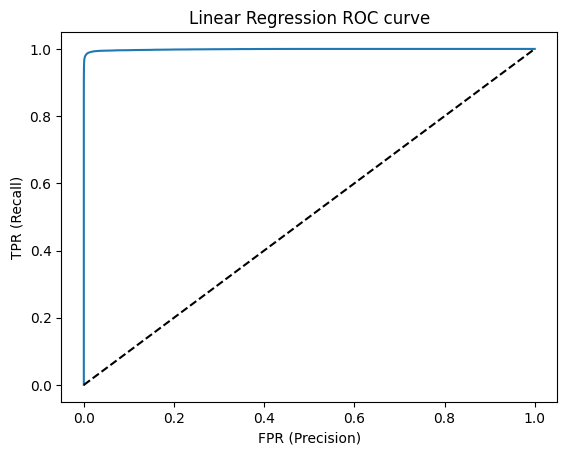

In [ ]:

fpr, tpr, _ = roc_curve(y_test, RF_probability)

plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

#### 2. Confusion Matrix

[[89740   361]
 [10588 99951]]


<Axes: >

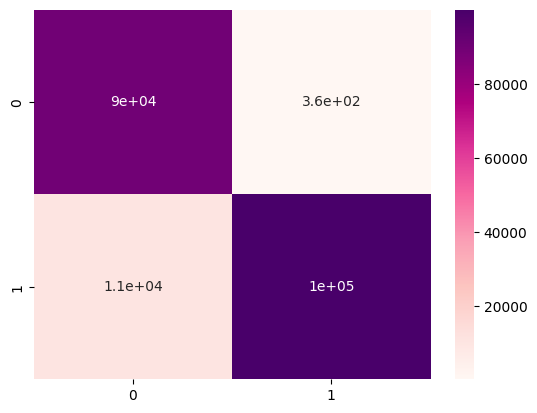

In [ ]:
cm=confusion_matrix(y_pred,y_test)
print(cm)
sns.heatmap(cm,annot=True,cmap='RdPu')

### ML Model - 3

In [ ]:
# Instantiate the Random Forest Classifier
xgb=XGBClassifier()

# Fit the model on the training data
XGB_fit=xgb.fit(X_train, y_train)

# Predict the target variable on the test data
y_predict = XGB_fit.predict(X_test)

# Get the probability predictions for the positive class
XGB_probability = XGB_fit.predict_proba(X_test)[:,1]

# Calculate accuracy
acc_xgb=accuracy_score(y_test,y_predict)

# Calculate recall
recall_xgb=recall_score(y_test,y_predict)

# Calculate precision
precision_xgb=precision_score(y_test,y_predict)

# Calculate F1 score
f1score_xgb=f1_score(y_test,y_predict)

# Calculate AUC-ROC score
AUC_xgb=roc_auc_score(y_predict,y_test)

# Print accuracy and AUC values of the model
print("Accuracy:",accuracy_score(y_predict,y_test))
print("ROC_AUC Score:",AUC_xgb)

Accuracy: 0.815405701754386
ROC_AUC Score: 0.836710956108145


In [ ]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.69      0.92      0.79     75091
           1       0.94      0.75      0.84    125549

    accuracy                           0.82    200640
   macro avg       0.82      0.84      0.81    200640
weighted avg       0.85      0.82      0.82    200640



#### 1. ROC curve

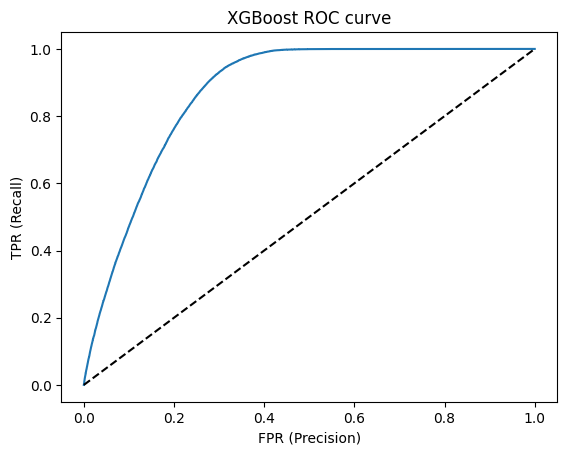

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, XGB_probability)

plt.title('XGBoost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

#### 2. Confusion Matrix

[[69191 31137]
 [ 5900 94412]]


<Axes: >

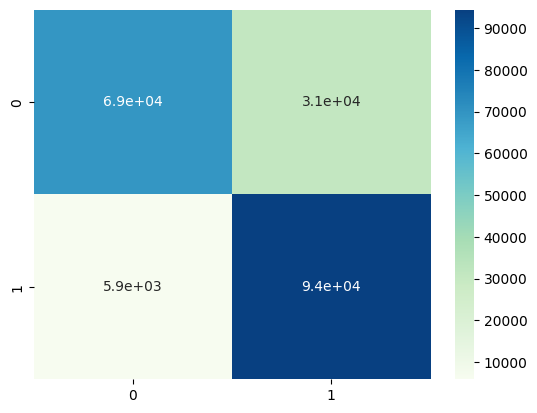

In [ ]:
cm=confusion_matrix(y_test,y_predict)
print(cm)
sns.heatmap(cm,annot=True,cmap='GnBu')

## ***9. Compairing all the models***

In [ ]:
ind=['Logistic regression','Randomforest','XGBClassifier']
data={"Accuracy":[acc_lr,acc_rf,acc_xgb],"Recall":[recall_lr,recall_rf,recall_xgb],"Precision":[precision_lr,precision_rf,precision_xgb],
    'f1_score':[f1score_lr,f1score_rf,f1score_xgb],"ROC_AUC":[AUC_LR,AUC_RF,AUC_xgb]}
result=pd.DataFrame(data=data,index=ind)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.783862,0.977749,0.704527,0.818951,0.819054
Randomforest,0.945430,0.996401,0.904215,0.948072,0.998836
XGBClassifier,0.815406,0.941184,0.751993,0.836019,0.836711


By comparing the all 3 models we can conclude that Random Forest and XGBClassifier models performed better than Logistics Regression model. From which Random Forest performed best with 94% accuracy.

# **Conclusion**

Most customers are not willing to purchase vehicle insurance.

A higher percentage of males (61%) show interest in obtaining insurance compared to females (38%).

Individuals aged 30-50 exhibit the highest interest in securing vehicle insurance.

Customers who own vehicles with a 1-2 year age guarantee are the most inclined to get insurance.

Possession of a driving license is also a factor.

Key features impacting the likelihood of purchasing insurance include vehicle vintage, annual premium, and age.

Among various models compared using metrics like ROC curve, accuracy, precision, F1 score, and recall, the Random Forest model yields the best results.